In [1]:
# 240819 (월) (4)

### 1. 문제정의
- 사내 이직률을 낮춰 다니고 싶은 회사 다니기 싫은 회사 데이터를 만들기

### 2. 데이터 수집
 - 직원 이직 데이터

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 데이터 업로드
import numpy as np
import pandas as pd

df = pd.read_csv('./data/job_transfer.csv')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 3. 데이터 전처리
- 결측치X -> 생략

In [8]:
df.shape # (1470, 35)

(1470, 35)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 4. 탐색적 데이터 분석(EDA)

In [11]:
# 이직 
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [12]:
# 이직률 약 16%
237 / (237 + 1233) # 0.16122448979591836

0.16122448979591836

In [13]:
# 이직 = 0, 이직안한 = 1 로 수정
import numpy as pd
# np.where(조건, T, F)
df['Attrition'] = np.where(df['Attrition']=='Yes', 1, 0) # 자 :where 함수 통해 수정시킴
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [14]:
# 성별, 연령 분석
# -> 구간화 # 자 : binning 바이닝
df['Age_gp'] = np.where(df['Age']<=30, '30 이하', 
        np.where(df['Age']<=40, '30-40대', '40대 이상'))
df[['Age','Age_gp']]

,Age,Age_gp
0,41,40대 이상
1,49,40대 이상
2,37,30-40대
3,33,30-40대
4,27,30 이하
...,...,...
1465,36,30-40대
1466,39,30-40대
1467,27,30 이하
1468,49,40대 이상


In [15]:
# 240819(5)

In [16]:
# 연령 그룹별 이직률 현황
df_gp = df.groupby('Age_gp')['Attrition'].agg(['count','sum'])
df_gp['ratio'] =round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp
# 나이가 어릴수록 이직 비율이 높아진다
# 자: count==전체 사원수, sum==이직자수, ratio ==이직률

,count,sum,ratio
Age_gp,,,
30 이하,386,100,25.9
30-40대,619,85,13.7
40대 이상,465,52,11.2


In [17]:
# 성별 이직률 현황
df_gp = df.groupby('Gender')['Attrition'].agg(['count','sum'])
# 지:count : 사원수, sum : 이직자수
df_gp['ratio'] = round((df_gp['sum']/df_gp['count']) *100, 1) # 자: 소수 첫번째자리까지
df_gp
# 남성 직원의 이직률이 좀 더 높음

,count,sum,ratio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [18]:
# 부서별 이직률 현황
df['Department']
df_gp = df.groupby('Department')['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count'])*100, 1)
df_gp
# Sales 부서의 이직률이 가장 높음

,count,sum,ratio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


In [19]:
# 인간관계 만족도, 업무 만족도와 이직간의 상관관계 확인해보기

# RelationshipSatisfaction : 인간관계 만족도
# JobSatisfaction : 업무만족도
df[['JobSatisfaction', 'RelationshipSatisfaction', 'Attrition']].head()

,JobSatisfaction,RelationshipSatisfaction,Attrition
0,4,1,1
1,2,4,0
2,3,2,1
3,3,3,0
4,2,4,0


In [20]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_gp'],
      dtype='object')

In [21]:
df['Department']

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object

In [22]:
# 업무 만족도별 이직률 현황
df_gp=df.groupby(['JobSatisfaction','RelationshipSatisfaction'])['Attrition'].agg(['count','sum'])
# 자:인간관계 만족도(RelationshipSatisfaction) 1~4, 업무 만족도(JobSatisfaction) 1~4
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count'])*100, 1)
df_gp

# 업무 만족도가 낮은 직원은 인간관계 만족도가 낮을수록 이직률이 증가하는 경향이 보여짐
# 업무만족도가 높은 직원은 인간관계에 따른 이직률에 영향을 덜 받은 것으로 보여짐

count  sum  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                            54   16   29.6
                2                            57   15   26.3
                3                            91   22   24.2
                4                            87   13   14.9
2               1                            53   15   28.3
                2                            57    8   14.0
                3                            81   13   16.0
                4                            89   10   11.2
3               1                            85   16   18.8
                2                            94   11   11.7
                3                           133   19   14.3
                4                           130   27   20.8
4               1                            84   10   11.9
                2                            95   11   11.6
                3                           154   17   11.0
                4                           126   14   11.1

In [23]:
# YearsAtCompany : 회사에서 근무한 기간
# YearsInCurrentRole : 현재 역할에서 근무한 기간
df[['YearsAtCompany','YearsInCurrentRole']]

,YearsAtCompany,YearsInCurrentRole
0,6,4
1,10,7
2,0,0
3,8,7
4,2,2
...,...,...
1465,5,2
1466,7,7
1467,6,2
1468,9,6


In [24]:
# 240819(6)

In [25]:
# 근속년수 대비 한 가지 역할을 맡은 연수의 비중
df['Role_Company'] = df['YearsInCurrentRole'] / df['YearsAtCompany'] # 자 : 0 이라서 결측치 발생
df['Role_Company'].fillna(0, inplace=True)
# 결측치 : 신입(근속년수가 1년이 채 안 된 직원)

In [26]:
df['Role_Company']

0       0.666667
1       0.700000
2       0.000000
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: Role_Company, Length: 1470, dtype: float64

<Axes: xlabel='Role_Company', ylabel='Density'>

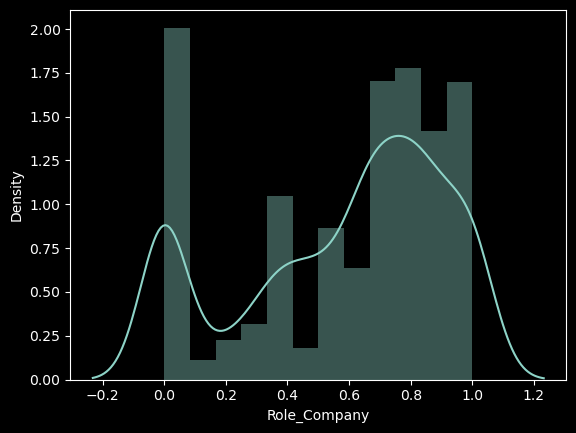

In [27]:
# Role_Company의 분포 확인 (그래프)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['dark_background']) # 자: 검정 배경
sns.distplot(df['Role_Company'])

In [28]:
# 구간

# 'Role_Company'
# '0.4 이하'
# '0.4-0.8'
# '0.8 초과'

# 자영풀이(맞음)
df['Role_Company_gp'] = np.where(df['Role_Company']<= 0.4, '0.4 이하', 
                                 np.where(df['Role_Company']<= 0.8, '0.4-0.8','0.8 초과' ))
df[['Role_Company', 'Role_Company_gp']]

,Role_Company,Role_Company_gp
0,0.666667,0.4-0.8
1,0.700000,0.4-0.8
2,0.000000,0.4 이하
3,0.875000,0.8 초과
4,1.000000,0.8 초과
...,...,...
1465,0.400000,0.4 이하
1466,1.000000,0.8 초과
1467,0.333333,0.4 이하
1468,0.666667,0.4-0.8


In [29]:
# 근속년수 대비 비율
df_gp = df.groupby('Role_Company_gp')['Attrition'].agg(['count','sum'])
df_gp

df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']*100), 1)
df_gp
# 근속년수 대비 같은 일을 오래한 경우 이직률이 낮다.

# 자 : count==직원수, sum==이직자수, ratio==이직률

,count,sum,ratio
Role_Company_gp,,,
0.4 이하,454,103,22.7
0.4-0.8,621,81,13.0
0.8 초과,395,53,13.4


In [30]:
# 야근 여부에 따른 이직률 현황
# df['OverTime']
df_gp = df.groupby('OverTime')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']*100), 1)
df_gp
# 야근을 하는 직원은 이직률이 상대적으로 높다

,count,sum,ratio
OverTime,,,
No,1054,110,10.4
Yes,416,127,30.5


In [31]:
# PercentSalaryHike : 연봉 인상률
df_gp = df.groupby(['OverTime', 'PercentSalaryHike'])['Attrition'].agg(['count','sum']) # 자: 야근여부, 연봉인상률
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']*100), 1)
df_gp
# 야근 No 직원은 연봉 인상률과 관계없이 이직률이 평균(16%)보다 낮은 편

# 자 : 전체 이직률 평균 : 16%
# 자 : 야근 안 하는 사람은 연봉인상률 상관없이 이직률 16% 이하
# 자 : 야근하는 사람은 연봉인상률 상관없이 16% 이직률 이상

count  sum  ratio
OverTime PercentSalaryHike                   
No       11                   149   19   12.8
         12                   139   18   12.9
         13                   144   14    9.7
         14                   145    8    5.5
         15                    80   12   15.0
         16                    55    8   14.5
         17                    66    9   13.6
         18                    60    5    8.3
         19                    55    3    5.5
         20                    40    4   10.0
         21                    36    2    5.6
         22                    41    6   14.6
         23                    19    1    5.3
         24                    12    1    8.3
         25                    13    0    0.0
Yes      11                    61   22   36.1
         12                    59   15   25.4
         13                    65   20   30.8
         14                    56   16   28.6
         15                    21    6   28.6
         16                    23    6   26.1
         17                    16    5   31.2
         18                    29    8   27.6
         19                    21    6   28.6
         20                    15    3   20.0
         21                    12    3   25.0
         22                    15    6   40.0
         23                     9    5   55.6
         24                     9    5   55.6
         25                     5    1   20.0

In [32]:

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_gp', 'Role_Company', 'Role_Company_gp'],
      dtype='object')

In [33]:
df_gp_plot = df_gp.reset_index()

In [34]:
df_gp_plot = df_gp_plot[df_gp_plot['OverTime']=='Yes'] # 자 : 야근하는 사람만 뽑힙
df_gp_plot
# 자 : 야근하는 사람들의 데이터만 분석하기 위해서!

,OverTime,PercentSalaryHike,count,sum,ratio
15,Yes,11,61,22,36.1
16,Yes,12,59,15,25.4
17,Yes,13,65,20,30.8
18,Yes,14,56,16,28.6
19,Yes,15,21,6,28.6
20,Yes,16,23,6,26.1
21,Yes,17,16,5,31.2
22,Yes,18,29,8,27.6
23,Yes,19,21,6,28.6
24,Yes,20,15,3,20.0


In [35]:
# 240819(7)

<BarContainer object of 15 artists>

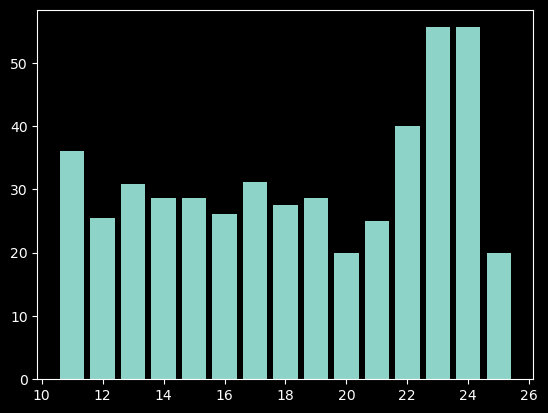

In [36]:
# 야근 Yes 직원 Data 분석
plt.bar(df_gp_plot['PercentSalaryHike'], df_gp_plot['ratio'])
# 연봉 20%상승률 까지 감소하는 추세가 보이지만,
# 22% 이상 연봉 상승하는 핵심인재의 경우 이직률이 높다
# 연봉 인상률이 높은 직원의 야근 시간을 줄이는 것이 이직을 방지할 방법 중 하나로 보임

### 5. 모델 선택 및 하이퍼파라미터 튜닝
- 데이터 타입별로 구분
- 라벨인코딩
- 데이터 정리
- train, test 나누기
- Support Vector Machine Classifier
- Logistic Regression

In [38]:
# 데이터 타입별로 구분
for i in df.columns:
    print(df[i].dtypes, df[i].dtypes=='O') # 대분자 O, Object 컬럼 True

# 자: int 나 float은 다양하기 때문에 오브젝트만 뽑음! 불리언타입으로!

int64 False
int32 False
object True
int64 False
object True
int64 False
int64 False
object True
int64 False
int64 False
int64 False
object True
int64 False
int64 False
int64 False
object True
int64 False
object True
int64 False
int64 False
int64 False
object True
object True
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
object True
float64 False
object True


In [39]:
# numeric,  categorical value 나누기
# 자 : 수치데이터와 범주형 값 나누기
numeric_list = []
categorical_list = []

for i in df.columns:
    if df[i].dtype=='O': # object 타입이라면 categorical_list에 컬럼명 담기
        categorical_list.append(i)
    else: # object가 아닌 숫자 타입이라면 numeric_list에 컬럼명 담기
        numeric_list.append(i)

print("categorical_list :",categorical_list)
print("numeric_list : ",numeric_list)

categorical_list : ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Age_gp', 'Role_Company_gp']
numeric_list :  ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Role_Company']


In [40]:
# 모델 학습을 위한 X, y로 데이터 나누기
X  = df.drop(['Attrition', 'Age_gp','Role_Company_gp', 'Role_Company'], axis=1)
y = df['Attrition']

In [41]:
# 훈련, 평가 데이터로 나누기
from sklearn.model_selection import train_test_split

# 훈련과 평가용 데이터 분리
# stratify : 정답 class 비율 유지
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    stratify=y) # 정답 calss 비율 유지

# 자: 이직한사람>이직안한사람 비율 많다

In [42]:
X_train.shape, y_train.shape # 자: 좀 다르다?

((1029, 34), (1029,))

In [43]:
X_test.shape, y_test.shape

((441, 34), (441,))

In [44]:
# EDA 과정에서 생성한 변수들 제거
categorical_list.remove('Age_gp')
categorical_list.remove('Role_Company_gp')

In [45]:
# 자 : 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
for col in categorical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(X_train[col].values) + list(X_test[col].values))
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [46]:
X_test[categorical_list].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
431,2,1,1,0,2,2,0,0
1315,2,1,4,0,6,1,0,1
1195,2,1,1,1,3,2,0,0
1278,2,1,1,1,0,1,0,1
1431,2,2,2,0,7,1,0,0


In [94]:
# 240820(1)

모델 학습 및 평가

### 6.학습

In [97]:
# 240820(2)

In [102]:
# Supprot Vector Machine Classifier
from sklearn.svm import SVC

In [104]:
# 모델 객체 생성
svc = SVC(C=1) # 규제 강도(역수), 값이 클수록 규제 강도는 낮아짐

In [108]:
# 모델 학습
svc.fit(X_train, y_train) # (훈련용 문제 , 훈련용 답)

SVC(C=1)

In [112]:
# 예측
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [114]:
y_pred_train # 자 : X_train 문제 통해서 이직 할 것 같다 vs 안 할 것 같다에 대한 예측값 담김

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
y_pred_test# 자 : X_test 문제 통해서 이직 할 것 같다 vs 안 할 것 같다에 대한 예측값 담김

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 7. 평가

In [122]:
# 분류 평가지표
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       863
           1       0.00      0.00      0.00       166

    accuracy                           0.84      1029
   macro avg       0.42      0.50      0.46      1029
weighted avg       0.70      0.84      0.77      1029

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



In [126]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# 240820(3)

In [130]:
lr = LogisticRegression(C=0.2, max_iter=10000) # 모델 생성
lr.fit(X_train, y_train)

LogisticRegression(C=0.2, max_iter=10000)

In [136]:
# 예측
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [140]:
# 분류 평가지표
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       863
           1       0.72      0.36      0.48       166

    accuracy                           0.87      1029
   macro avg       0.80      0.66      0.70      1029
weighted avg       0.86      0.87      0.86      1029

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.82      0.32      0.46        71

    accuracy                           0.88       441
   macro avg       0.85      0.66      0.70       441
weighted avg       0.87      0.88      0.86       441



In [142]:
# Logistic Regression의 모델 성능이 더 좋음

In [148]:
print('train score : ', lr.score(X_train, y_train))
print('test score : ', lr.score(X_test, y_test))
# train, test의 성능 차이가 크지 않음 -> 일반화가 잘 된 모델

train score :  0.8736637512147716
test score :  0.8798185941043084


In [188]:
# 모델에 가장 많은 영향을 미치는 변수 탐색
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.style.use(['dark_background'])

ftr_importances_values = lr.coef_[0] # 모델 가중치(w)
# 자 : 특성 중요도(feature importances)

ftr_importances_values = pd.Series(ftr_importances_values, index = X_train.columns) # 자 : 그래프로 만들기 위해서 시리즈 객체로 변환
ftr_top10 = ftr_importances_values.sort_values(ascending=False)[:10]
ftr_top10

OverTime                   1.304785
MaritalStatus              0.525063
Department                 0.424758
Gender                     0.195217
NumCompaniesWorked         0.165222
YearsAtCompany             0.149693
YearsSinceLastPromotion    0.129910
Education                  0.044752
EducationField             0.041350
DistanceFromHome           0.035677
dtype: float64

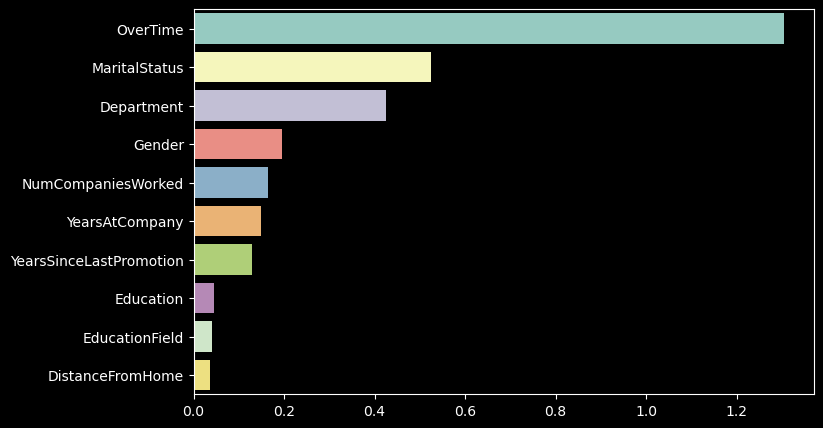

In [194]:
#자: 그래프 그리기
plt.figure(figsize=(8,5))
sns.barplot(x = ftr_top10, y=ftr_top10.index)
plt.show()

In [198]:
# MaritalStatus : 결혼 상태
# Divorced : 이혼
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [214]:
# MaritalStatus 특성의 직원 수, 이직자 수 확인 
df_ma = df[['MaritalStatus', 'Attrition']].groupby('MaritalStatus')['Attrition'].agg(['count','sum'])
df_ma

,count,sum
MaritalStatus,,
Divorced,327,33
Married,673,84
Single,470,120


In [220]:
# 자 : 비율 확인
df_ma['ratio'] = round((df_ma['sum'] / df_ma['count'] ) *100, 1)
df_ma
# 싱글들의 이직이 많음
# 이혼한 직원의 이직이 가장 적음

,count,sum,ratio
MaritalStatus,,,
Divorced,327,33,10.1
Married,673,84,12.5
Single,470,120,25.5


In [232]:
import pickle # 자 : 파이썬의 객체들 그대로 저장 가능
# 모델 저장
saved_model = pickle.dumps(lr)

# 모델 읽어오기
cklf_from_pickle = pickle.loads(saved_model)
cklf_from_pickle

LogisticRegression(C=0.2, max_iter=10000)

In [ ]:
# 240820(4) - 코랩으로